![QuestionOne](images/q1.png)

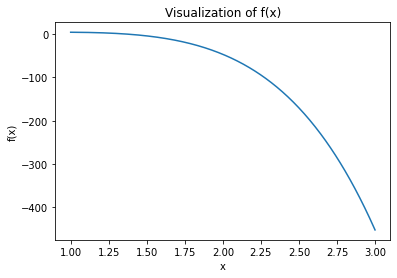

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1,3,500)
f = np.polyval([-2, 0, 0, 3, 2, 1], x)

plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Visualization of f(x)')
plt.show()

![QuestionTwo](images/q2.png)

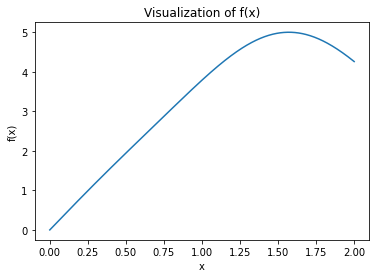

In [5]:
import matplotlib.pyplot as plt
import numpy as np

"""
To evaluate this function using polyval, x can be substituted as 
sin(x).
"""

x = np.linspace(0,2,500)
f = np.polyval([1,0,0,0,4,0], np.sin(x))

plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Visualization of f(x)')
plt.show()


![QuestionThree](images/q3.png)

-------------Part A--------------
1) f(x) coefficients = [1, -3, 0, 0, 4, 1]
2) df(x)/dx coefficients = [5, -12, 0, 0, 4]
3) d2f(x)/dx2 coefficients = [20, -36, 0, 0]
4) integral f(t) coefficients = [0.16666666666666666, -0.6, 0.0, 0.0, 2.0, 1.0, 0.0]


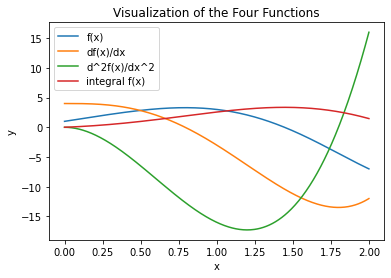

-------------Part B--------------
Real value roots are: [ 2.80193774  1.44504187 -0.2469796 ]
The results of polyval shows values for y very close to zero: [-5.17363929e-14  7.77156117e-16 -4.44089210e-16]


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Part A
print("-------------Part A--------------")
x = np.linspace(0,2,500)
f_x = np.poly1d([1,-3,0,0,4,1])
der_f_x = np.polyder(f_x, 1)
der_2_f_x = np.polyder(f_x, 2)
int_f_x = np.polyint(f_x)

print(f"1) f(x) coefficients = {list(f_x.coefficients)}")
print(f"2) df(x)/dx coefficients = {list(der_f_x.coefficients)}")
print(f"3) d2f(x)/dx2 coefficients = {list(der_2_f_x.coefficients)}")
print(f"4) integral f(t) coefficients = {list(int_f_x.coefficients)}")

f_x = np.polyval(f_x, x)
der_f_x = np.polyval(der_f_x, x)
der_2_f_x = np.polyval(der_2_f_x, x)
int_f_x = np.polyval(int_f_x, x)

plt.plot(x, f_x, label="f(x)")
plt.plot(x, der_f_x, label="df(x)/dx")
plt.plot(x, der_2_f_x, label="d^2f(x)/dx^2")
plt.plot(x, int_f_x, label="integral f(x)")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualization of the Four Functions')
plt.show()

print("-------------Part B--------------")

# Getting the roots of f(x)
roots = np.roots(np.poly1d([1,-3,0,0,4,1]))
# Finding the indices where the roots are real
real = np.argwhere(np.iscomplex(roots)==False).squeeze()
print(f"Real value roots are: {np.real(roots[real])}")
# The purpose of np.real is to remove the +0j imaginary component.
f_x = np.polyval(np.poly1d([1,-3,0,0,4,1]), np.real(roots[real]))
print(f"The results of polyval shows values for y very close to zero: {f_x}")



![QuestionFour](images/q4.png)

In [7]:
import numpy as np
polynomial = [1,0,2,1]
for order in range(4):
    polynomial = np.convolve(polynomial, [1,0,2,1])
print(f"Coefficients of x: {polynomial}")

Coefficients of x: [  1   0  10   5  40  40  90 120 140 170 152 120  85  40  10   1]


![Question](images/q5.png)

4th order polynomial f(x) =
           4          3         2
0.008333 x - 0.3917 x + 2.117 x - 1.233 x + 1

f(x) coefficients = [0.008333333333333212, -0.3916666666666662, 2.116666666666668, -1.2333333333333376, 1.000000000000003]


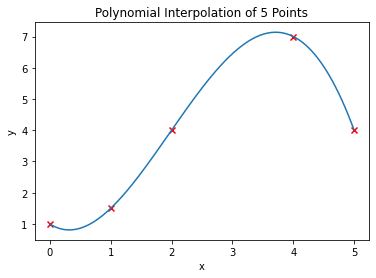

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([0,1,2,4,5])
y = np.array([1,1.5,4,7,4])

polynomial = np.polyfit(x,y,deg=4)
f_x = np.poly1d(polynomial)
print(f"4th order polynomial f(x) =\n {f_x}\n")
print(f"f(x) coefficients = {list(f_x.coefficients)}")

f_x = np.polyval(f_x, np.linspace(0,5,200))

plt.plot(np.linspace(0,5,200), f_x)
plt.scatter(x, y, marker='x', color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Interpolation of 5 Points')
plt.show()


![QuestionSix](images/q6.png)

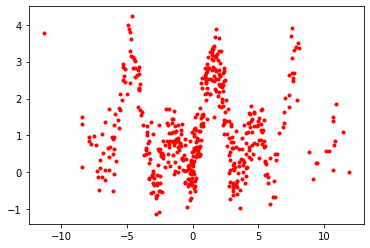

In [9]:
# Generate the data file.
import matplotlib.pyplot as plt
import numpy as np
#program to generate the measurement file
N = 500
x = 0.4 + 4*np.random.normal(loc=0,scale=1,size=N)
a = 0.1; b = 1; c = 2;
y = a + b*np.sin(x) + c*np.sin(x)**2 + 0.5*np.random.normal(loc=0,scale=1,size=N)
plt.plot(x,y,'r.')
np.save('meas.npy', np.append(x.reshape(N,1),y.reshape(N,1), axis=1))

------------------------Part A-----------------------
c=1.9803188167132717
b=1.0160130709648048
a=0.1264862901522765


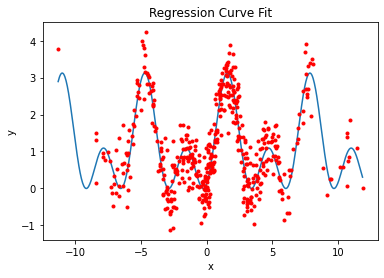

------------------------Part B-----------------------
The standard deviation of the error is 1.484518086133256


In [10]:
import matplotlib.pyplot as plt
import numpy as np

print("------------------------Part A-----------------------")
# Loading the data.
data = np.load("meas.npy")
x = data[:,0]
y = data[:,1]

# Finding the coefficients.
polynomial = np.polyfit(np.sin(x),y,deg=2)
for coeff, id in zip(polynomial, ['c', 'b', 'a']):
    print(f"{id}={coeff}")

xp= np.linspace(x.min(),x.max(),500)
# Plotting the results.
f_x = np.poly1d(polynomial)
f_x = np.polyval(f_x, np.sin(xp))

plt.plot(xp, f_x)
plt.plot(x,y,'r.')
plt.xlabel('x'); plt.ylabel('y');
plt.title('Regression Curve Fit')
plt.show()

print("------------------------Part B-----------------------")
# The error is the difference between the data and the regression curve fit.
error = y-f_x
print(f"The standard deviation of the error is {np.std(error)}")